In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df=pd.read_csv('MBA.csv')
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [3]:
# Display info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [4]:
# Check for empty records
df.isna().sum()

application_id       0
gender               0
international        0
gpa                  0
major                0
race              1842
gmat                 0
work_exp             0
work_industry        0
admission         5194
dtype: int64

In [5]:
# Fill the missing values
df['race'] = df['race'].fillna('Unknown')
df['admission'] = df['admission'].fillna('Deny')

In [6]:
# Describe variables with object dtype
df.describe(include=['object'])

,gender,major,race,work_industry,admission
count,6194,6194,6194,6194,6194
unique,2,3,6,14,3
top,Male,Humanities,Unknown,Consulting,Deny
freq,3943,2481,1842,1619,5194


In [7]:
# Convert categories to numerical values
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})
df['international'] = df['international'].map({True: 1, False: 0})
df['admission'] = df['admission'].map({'Admit': 1, 'Waitlist': 2, 'Deny': 0})

In [8]:
# perform one-hot encoding
df = pd.get_dummies(df, columns=['major', 'race', 'work_industry'], drop_first=True)

In [9]:
# Display columns
df.columns

Index(['application_id', 'gender', 'international', 'gpa', 'gmat', 'work_exp',
       'admission', 'major_Humanities', 'major_STEM', 'race_Black',
       'race_Hispanic', 'race_Other', 'race_Unknown', 'race_White',
       'work_industry_Consulting', 'work_industry_Energy',
       'work_industry_Financial Services', 'work_industry_Health Care',
       'work_industry_Investment Banking',
       'work_industry_Investment Management',
       'work_industry_Media/Entertainment', 'work_industry_Nonprofit/Gov',
       'work_industry_Other', 'work_industry_PE/VC',
       'work_industry_Real Estate', 'work_industry_Retail',
       'work_industry_Technology'],
      dtype='object')

In [10]:
# Check for#####    Sunburst### missing entry
df.isna().sum()

application_id                         0
gender                                 0
international                          0
gpa                                    0
gmat                                   0
work_exp                               0
admission                              0
major_Humanities                       0
major_STEM                             0
race_Black                             0
race_Hispanic                          0
race_Other                             0
race_Unknown                           0
race_White                             0
work_industry_Consulting               0
work_industry_Energy                   0
work_industry_Financial Services       0
work_industry_Health Care              0
work_industry_Investment Banking       0
work_industry_Investment Management    0
work_industry_Media/Entertainment      0
work_industry_Nonprofit/Gov            0
work_industry_Other                    0
work_industry_PE/VC                    0
work_industry_Re

In [11]:
df = df.dropna(subset=['admission'])

# Split the dataset into features and target variable
X = df.drop(columns=['admission', 'application_id'])  # Features
y = df['admission']  # Target (admission status)

Sunburst Chart

In [12]:
import plotly.express as px
fig = px.sunburst(df, path=['admission', 'gender', 'international', 'major_Humanities',
'major_STEM'], 
                  values='application_id')
fig.show()


Sankey Diagram

In [13]:
import plotly.graph_objects as go

# Prepare data
source = []
target = []
value = []

for i, status in enumerate(['gender', 'international', 'major_Humanities',
'major_STEM']):
    for j, outcome in enumerate(['Admit', 'Waitlist', 'Deny']):
        source.append(i)
        target.append(len(set(df[status])) + j)
        value.append(df[(df[status] == status) & (df['admission'] == outcome)].shape[0])

# Create Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = list(set(df['gender'])) + list(set(df['international'])) + list(set(df['major_Humanities']))+list(set(df['major_STEM'])) + ['Admit', 'Waitlist', 'Deny'],
      color = "blue"
    ),
    link = dict(
      source = source,
      target = target,
      value = value
  ))])

fig.show()


Violin Plot

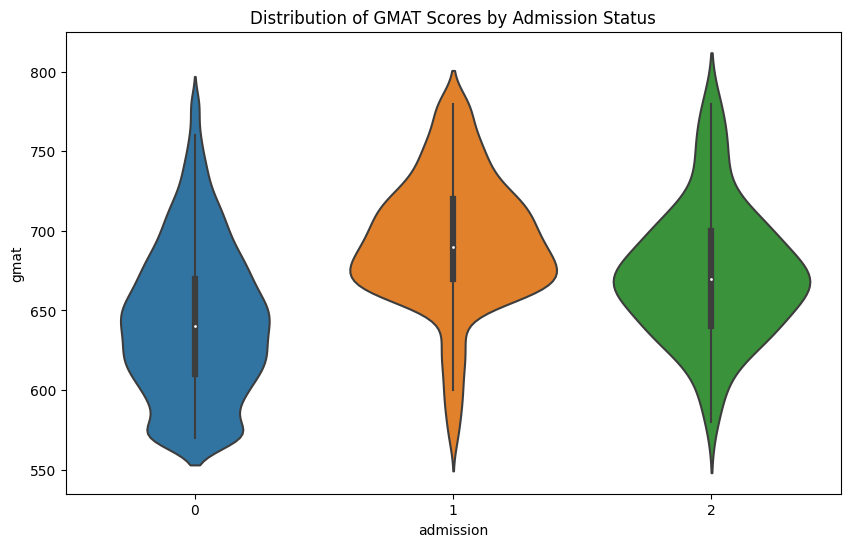

In [14]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='admission', y='gmat', data=df)
plt.title('Distribution of GMAT Scores by Admission Status')
plt.show()

Heatmap

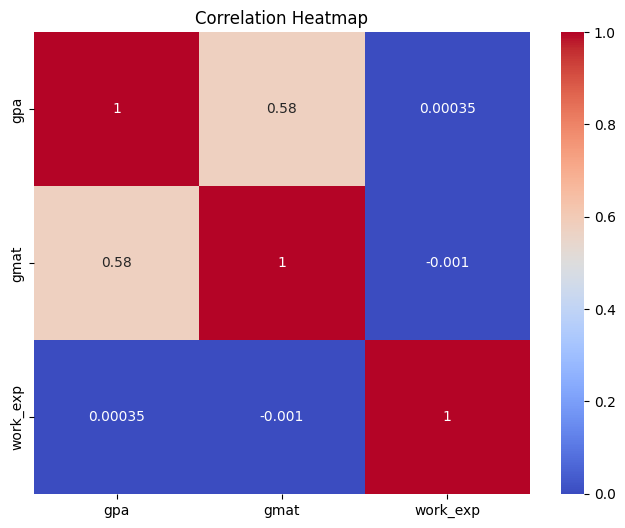

In [15]:
corr = df[['gpa', 'gmat', 'work_exp']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

3D Surface Plot

In [16]:
import plotly.graph_objects as go
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Prepare data
X = df[['gmat', 'gpa']]
y = df['admission']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train SVM model
model = SVC(kernel='rbf', probability=True)
model.fit(X_scaled, y)

# Create a grid of points
xx, yy = np.meshgrid(np.linspace(X['gmat'].min(), X['gmat'].max(), 100),
                     np.linspace(X['gpa'].min(), X['gpa'].max(), 100))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_scaled = scaler.transform(grid)

# Predict probabilities
Z = model.predict_proba(grid_scaled)[:, 1].reshape(xx.shape)

# Create 3D surface plot
fig = go.Figure(data=[go.Surface(z=Z, x=xx, y=yy)])
fig.update_layout(title='Admission Probability Surface',
                  scene = dict(xaxis_title='GMAT',
                               yaxis_title='GPA',
                               zaxis_title='Admission Probability'))
fig.show()


c:\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



Model Development and Evaluation

In [17]:
#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Logistic Regression
log_params = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
log_model = GridSearchCV(LogisticRegression(max_iter=1000), log_params, cv=5)
log_model.fit(X_train, y_train)

# Random Forest
rf_params = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20]}
rf_model = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_model.fit(X_train, y_train)

# Gradient Boosting
gb_params = {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1]}
gb_model = GridSearchCV(GradientBoostingClassifier(), gb_params, cv=5)
gb_model.fit(X_train, y_train)

# Neural Network
nn_params = {'hidden_layer_sizes': [(50,), (100,)], 'alpha': [0.0001, 0.001]}
nn_model = GridSearchCV(MLPClassifier(max_iter=1000), nn_params, cv=5)
nn_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000),
             param_grid={'alpha': [0.0001, 0.001],
                         'hidden_layer_sizes': [(50,), (100,)]})

In [20]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='weighted'),
        'recall': recall_score(y_test, y_pred, average='weighted'),
        'f1': f1_score(y_test, y_pred, average='weighted')
    }

models = [log_model, rf_model, gb_model, nn_model]
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Neural Network']

for name, model in zip(model_names, models):
    scores = evaluate_model(model, X_test, y_test)
    print(f"{name} - Accuracy: {scores['accuracy']:.3f}, Precision: {scores['precision']:.3f}, "
          f"Recall: {scores['recall']:.3f}, F1: {scores['f1']:.3f}")

Logistic Regression - Accuracy: 0.828, Precision: 0.773, Recall: 0.828, F1: 0.775
Random Forest - Accuracy: 0.826, Precision: 0.768, Recall: 0.826, F1: 0.772
Gradient Boosting - Accuracy: 0.827, Precision: 0.684, Recall: 0.827, F1: 0.749
Neural Network - Accuracy: 0.827, Precision: 0.684, Recall: 0.827, F1: 0.749


In [21]:
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(
    estimators=[('lr', log_model), ('rf', rf_model), ('gb', gb_model), ('nn', nn_model)],
    voting='soft'
)

ensemble_model.fit(X_train, y_train)
ensemble_scores = evaluate_model(ensemble_model, X_test, y_test)

print(f"Ensemble Model - Accuracy: {ensemble_scores['accuracy']:.3f}, "
      f"Precision: {ensemble_scores['precision']:.3f}, Recall: {ensemble_scores['recall']:.3f}, "
      f"F1: {ensemble_scores['f1']:.3f}")

Ensemble Model - Accuracy: 0.827, Precision: 0.684, Recall: 0.827, F1: 0.749


Analyze Feature Importances

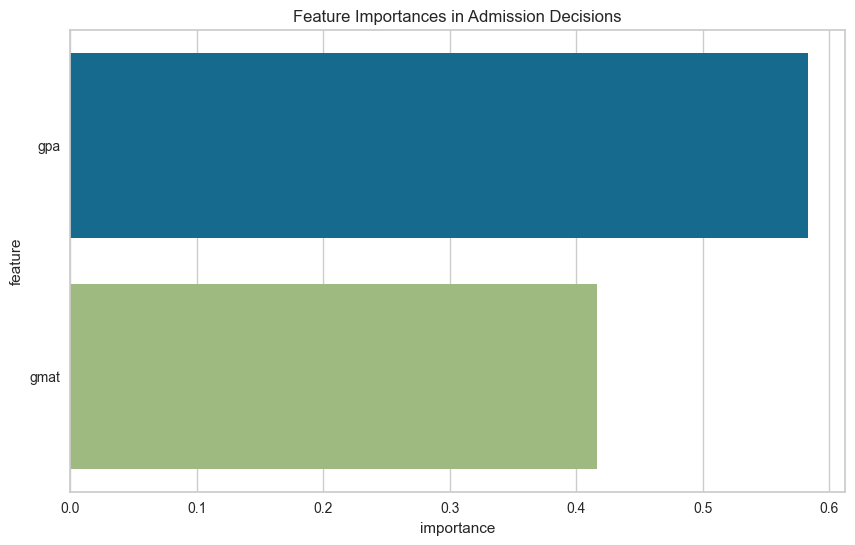

In [22]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances in Admission Decisions')
plt.show()

"What-If" Tool

This tool allows users to input their profile (GPA, GMAT score, and work experience) and see their predicted admission probability.

In [32]:
def what_if_tool(gpa, gmat, work_industry, model, scaler):
    # Scaler's expected features
    all_features = scaler.feature_names_in_

    # Create an input DataFrame with zeros
    input_data = pd.DataFrame(0, index=[0], columns=all_features)

    # Populate 'gpa' and 'gmat'
    if 'gpa' in input_data.columns:
        input_data['gpa'] = gpa
    if 'gmat' in input_data.columns:
        input_data['gmat'] = gmat

    # Populate work industry columns
    for industry, value in work_industry.items():
        column_name = f'work_industry_{industry}'
        if column_name in input_data.columns:
            input_data[column_name] = value

    # Scale the input data
    input_scaled = scaler.transform(input_data)

    # Predict admission probability
    admission_prob = model.predict_proba(input_scaled)[0][1]
    return admission_prob


In [33]:
example_gpa = 3.6
example_gmat = 700
example_work_industry = {
    'Consulting': 1,
    'Energy': 0,
    'Financial Services': 0,
    'Health Care': 0,
    'Investment Banking': 0,
    'Investment Management': 0,
    'Media/Entertainment': 0,
    'Nonprofit/Gov': 0,
    'Other': 0,
    'PE/VC': 0,
    'Real Estate': 0,
    'Retail': 0,
    'Technology': 0
}

admission_probability = what_if_tool(example_gpa, example_gmat, example_work_industry, model, scaler)
print(f"Predicted Admission Probability: {admission_probability:.2f}")


Predicted Admission Probability: 0.42


 "Applicant Profile Optimizer"

This function suggests ways to improve admission chances by identifying key factors and recommending changes.

In [34]:
def profile_optimizer(current_gpa, current_gmat, current_work_exp=None):
    recommendations = []
    
    # Analyze GPA
    gpa_importance = feature_importances.loc[
        feature_importances['feature'] == 'gpa', 'importance'
    ].values
    if len(gpa_importance) > 0 and current_gpa < gpa_importance[0]:
        recommendations.append("Consider improving your GPA by taking additional courses or certifications.")
    
    # Analyze GMAT score
    gmat_importance = feature_importances.loc[
        feature_importances['feature'] == 'gmat', 'importance'
    ].values
    if len(gmat_importance) > 0 and current_gmat < gmat_importance[0]:
        recommendations.append("Aim to increase your GMAT score by practicing with official test prep materials.")
    
    # Analyze Work Experience
    if current_work_exp is not None:
        work_exp_importance = feature_importances.loc[
            feature_importances['feature'] == 'work_exp', 'importance'
        ].values
        if len(work_exp_importance) > 0 and current_work_exp < work_exp_importance[0]:
            recommendations.append("Gain more work experience, especially in leadership roles or impactful projects.")

    # Additional Recommendations Placeholder (Optional)
    # You can add checks for other features or criteria as needed.
    
    return recommendations

# Example usage of the optimizer
current_profile = {
    'gpa': 2.0, 
    'gmat': 680, 
    'work_exp': 2  # Assuming work experience is in years
}

recommendations = profile_optimizer(
    current_profile['gpa'], 
    current_profile['gmat'], 
    current_work_exp=current_profile['work_exp']
)

print("Recommendations to Improve Admission Chances:")
for rec in recommendations:
    print(f"- {rec}")

       


Recommendations to Improve Admission Chances:


Generate Personalized Recommendations

This function generates tailored advice based on applicant background.

In [35]:
def personalized_recommendations(gender=None, international=None):
    advice = []
    
    # General advice for all applicants
    advice.append("Ensure your application essays highlight leadership skills and unique experiences.")
    
    if gender == "Female":
        advice.append("Consider emphasizing diversity initiatives or programs targeting women in business.")
    
    if international:
        advice.append("Focus on showcasing cross-cultural experiences and adaptability.")
    
    return advice

# Example usage of personalized recommendations
applicant_background = {'gender': "Female", 'international': True}
recommendations = personalized_recommendations(applicant_background['gender'], applicant_background['international'])
print("Personalized Recommendations:")
for rec in recommendations:
    print(f"- {rec}")


Personalized Recommendations:
- Ensure your application essays highlight leadership skills and unique experiences.
- Consider emphasizing diversity initiatives or programs targeting women in business.
- Focus on showcasing cross-cultural experiences and adaptability.


Clustering Algorithm for Applicant Archetypes

We will use K-Means clustering to identify distinct applicant archetypes

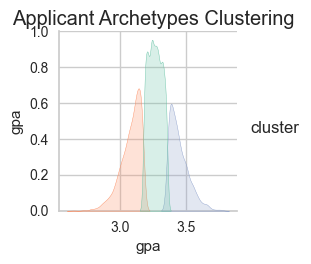

Cluster Centers:
[[ 0.08026669]
 [-1.14287254]
 [ 1.27984489]]


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Sample dataset of applicants (replace with actual data)
applicants = pd.DataFrame(df['gpa'])

# Scale the data
scaler = StandardScaler()
scaled_applicants = scaler.fit_transform(applicants)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
applicants['cluster'] = kmeans.fit_predict(scaled_applicants)

# Visualize clusters
sns.pairplot(applicants, hue='cluster', palette='Set2', diag_kind='kde')
plt.suptitle('Applicant Archetypes Clustering', y=1.02)
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)


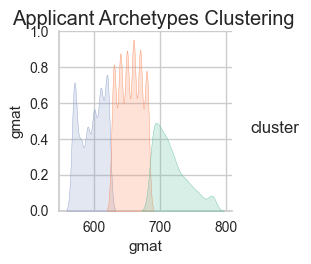

Cluster Centers:
[[ 1.33919971]
 [ 0.07819164]
 [-1.10572068]]


In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

# Sample dataset of applicants (replace with actual data)
applicants = pd.DataFrame(df['gmat'])

# Scale the data
scaler = StandardScaler()
scaled_applicants = scaler.fit_transform(applicants)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
applicants['cluster'] = kmeans.fit_predict(scaled_applicants)

# Visualize clusters
sns.pairplot(applicants, hue='cluster', palette='Set2', diag_kind='kde')
plt.suptitle('Applicant Archetypes Clustering', y=1.02)
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)
